In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

with open('mfeat-pix.txt', 'r', encoding='ascii') as dataFile:
    mfeat_pix = pd.read_table(dataFile, sep='  ', header=None, engine='python').values

for i in range(10):
    for j in range(10):
        pic = mfeat_pix[200*i+j][:]
        picmat_reverse = -pic
        picmat = picmat_reverse.reshape(16, 15)
        plt.figure(1, figsize = (11, 6.5))
        plt.subplot(10, 10, i*10+j+1)
        plt.axis('off')
        plt.imshow(picmat, cmap='gray')

plt.show()

In [12]:
mfeat_pix.type

AttributeError: 'numpy.ndarray' object has no attribute 'type'

In [6]:
mfeat_pix1=pd.read_table('mfeat-pix.txt')

In [11]:
mfeat_pix1.shape

(1999, 1)

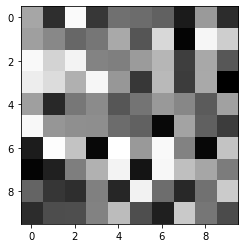

In [4]:
# Plotting images
a = np.random.random((10,10))
plt.figure()
plt.imshow(a, cmap='gray')
plt.show()

In [5]:
X, y = mfeat_pix[:,1:], mfeat_pix[:, 0]

In [6]:
split = int(X.shape[0] * 0.80)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y_train)
print(y_test)

(1600, 239) (1600,)
(400, 239) (400,)
[0 0 0 ... 1 0 5]
[0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 3 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 5 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [7]:
def knn(X_train, y_train, test_point, k=1):
    
    distances = [] # Contains list of tuples (distance, label
    
    for data_point, label in zip(X_train, y_train):
        distances.append((euclidean(test_point, data_point), label))
    #     for i in range(X_train.shape[0]):
    #         data_point = X_train[i]
    #         label = y_train[i]
    
    sorted_distances = sorted(distances, key=lambda x: x[0])
    k_nearest_neighbors = np.array(sorted_distances[:k])
    freq = np.unique(k_nearest_neighbors[:,1], return_counts=True)
    labels, counts = freq
    majority_vote = labels[counts.argmax()]
    return majority_vote

In [8]:
def euclidean(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2))

euclidean(np.array([1,2,3]), np.array([4,5,6]))

5.196152422706632

In [9]:
def calculate_accuracy(X_test, y_test, X_train, y_train, k=1):
    
    predictions = []
    
    for test_point in X_test:
        pred_label = knn(X_train, y_train, test_point, k)
        predictions.append(pred_label)
    
    predictions = np.array(predictions)
    
    accuracy = (predictions == y_test).sum() / y_test.shape[0]
    return accuracy

In [10]:
calculate_accuracy(X_test, y_test, X_train, y_train, k=1)

0.8025

In [11]:
from sklearn import neighbors, datasets
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

NameError: name 'KNeighborsClassifier' is not defined

In [15]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X, y, cv=10)

array([0.81280788, 0.80597015, 0.79104478, 0.44278607, 0.805     ,
       0.83      , 0.86934673, 0.64321608, 0.82914573, 0.82233503])

In [17]:
from sklearn import neighbors, datasets
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.861


In [13]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA

# Plotting decision region
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
clf.fit(X_train2, y_train)
plot_decision_regions(X_train2, y_train, clf=clf, legend=2)

plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
# Adding axes annotations
plt.xlabel('X')
plt.ylabel('y')
plt.title('Knn with K='+ str(k))
plt.show()

NameError: name 'X_train' is not defined